<a href="https://colab.research.google.com/github/gnani321/basic-ds-/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
    df=pd.read_csv('Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


1.DATA CLEANING AND PREPARATION

In [ ]:
df.isna().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [ ]:
df.dtypes

,0
LB,float64
AC,float64
FM,float64
UC,float64
DL,float64
DS,float64
DP,float64
ASTV,float64
MSTV,float64
ALTV,float64


In [ ]:
#handling null values
for n in df.columns:
   df[n]=df[n].fillna(df[n].mean())

In [ ]:
df.isna().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


In [ ]:
#handling duplicates values
df.duplicated().sum()

2

In [ ]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.reset_index(drop=True)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2120,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2121,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2122,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [ ]:
df.dtypes

,0
LB,float64
AC,float64
FM,float64
UC,float64
DL,float64
DS,float64
DP,float64
ASTV,float64
MSTV,float64
ALTV,float64


In [ ]:
#handling in datatypes
for column in df.columns:
   if df[column].dtype != 'object':
    df[column]=pd.to_numeric(df[column],errors='coerce')

In [ ]:
#handling outliers
def handle_ouliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df[column]=np.where((df[column]<lower_bound)|(df[column]>upper_bound),df[column].median(),df[column])

In [ ]:
for col in df.columns:
    if df[col].dtype!='object':
      handle_ouliers(df,col)

# STATISTICAL SUMMARY

In [ ]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.0,2124.0,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.0
mean,133.265753,0.002946,0.000555,0.004344,0.001325,0.0,0.0,47.010105,1.234875,2.642895,7.589532,70.350098,0.319492,1.0
std,9.739722,0.003504,0.001300,0.002911,0.002156,0.0,0.0,17.154622,0.685146,5.750917,4.437029,38.619792,0.607308,0.0
min,106.000000,-0.000185,-0.003435,-0.000132,-0.000124,0.0,0.0,11.799846,0.200000,-1.043619,-0.200788,3.000000,-1.006614,1.0
25%,126.000000,0.000000,0.000000,0.001880,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.671705,37.000000,0.000000,1.0
50%,133.000000,0.001668,0.000000,0.004486,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.0
75%,140.000000,0.005107,0.000000,0.006505,0.002201,0.0,0.0,61.000000,1.600000,1.000000,10.200000,99.000000,1.000000,1.0
max,160.000000,0.014024,0.006272,0.012987,0.008197,0.0,0.0,87.000000,3.200000,27.000000,20.040354,180.000000,1.023635,1.0


50 % of LB values lies in between 126 - 140.

AC,  UC, DL, DS, DP toggle around 0, Most of them are close / equal to 0.

High stds of ASTV, Width suggests that presence of Outliers.

We can drop columns like DS, DP ,FM and NSP as there is no much variance to work with them.

In [ ]:
#dropping ds,dp,nsp
df.drop(['DS','DP','NSP','FM'],axis=1,inplace=True)

# DATA VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
numerical_columns=df.select_dtypes(include=np.number).columns
numerical_columns

Index(['LB', 'AC', 'UC', 'DL', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width',
       'Tendency'],
      dtype='object')

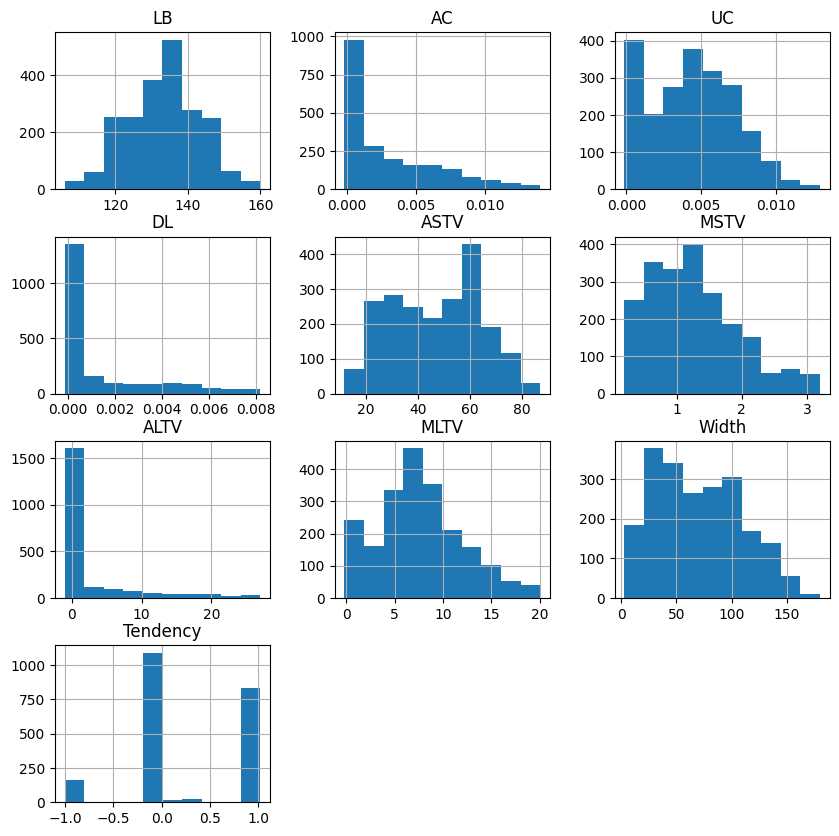

In [ ]:
# create histograms
df[numerical_columns].hist(figsize=(10,10))
plt.show()


There are no categorical columns to apply bar charts or pie charts

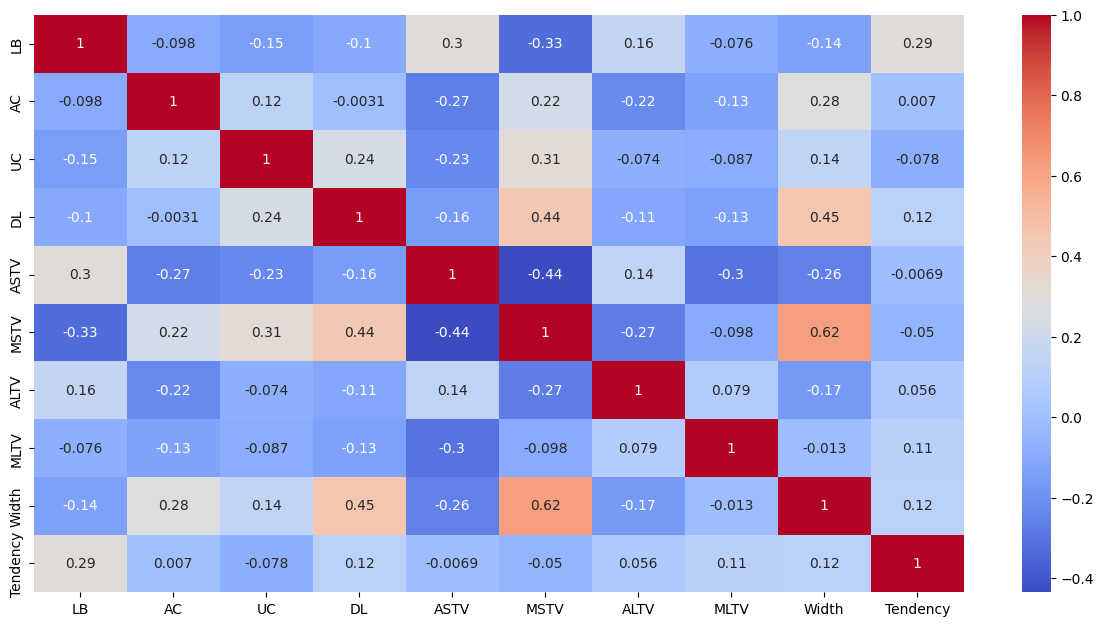

In [ ]:
#heatmap
plt.figure(figsize=(15, 7.5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Moderate positive correlation between MSTV & DL.

Moderate negative correlation between ALTV & MSTV

Most of them shows weak and no significant correlations at all.

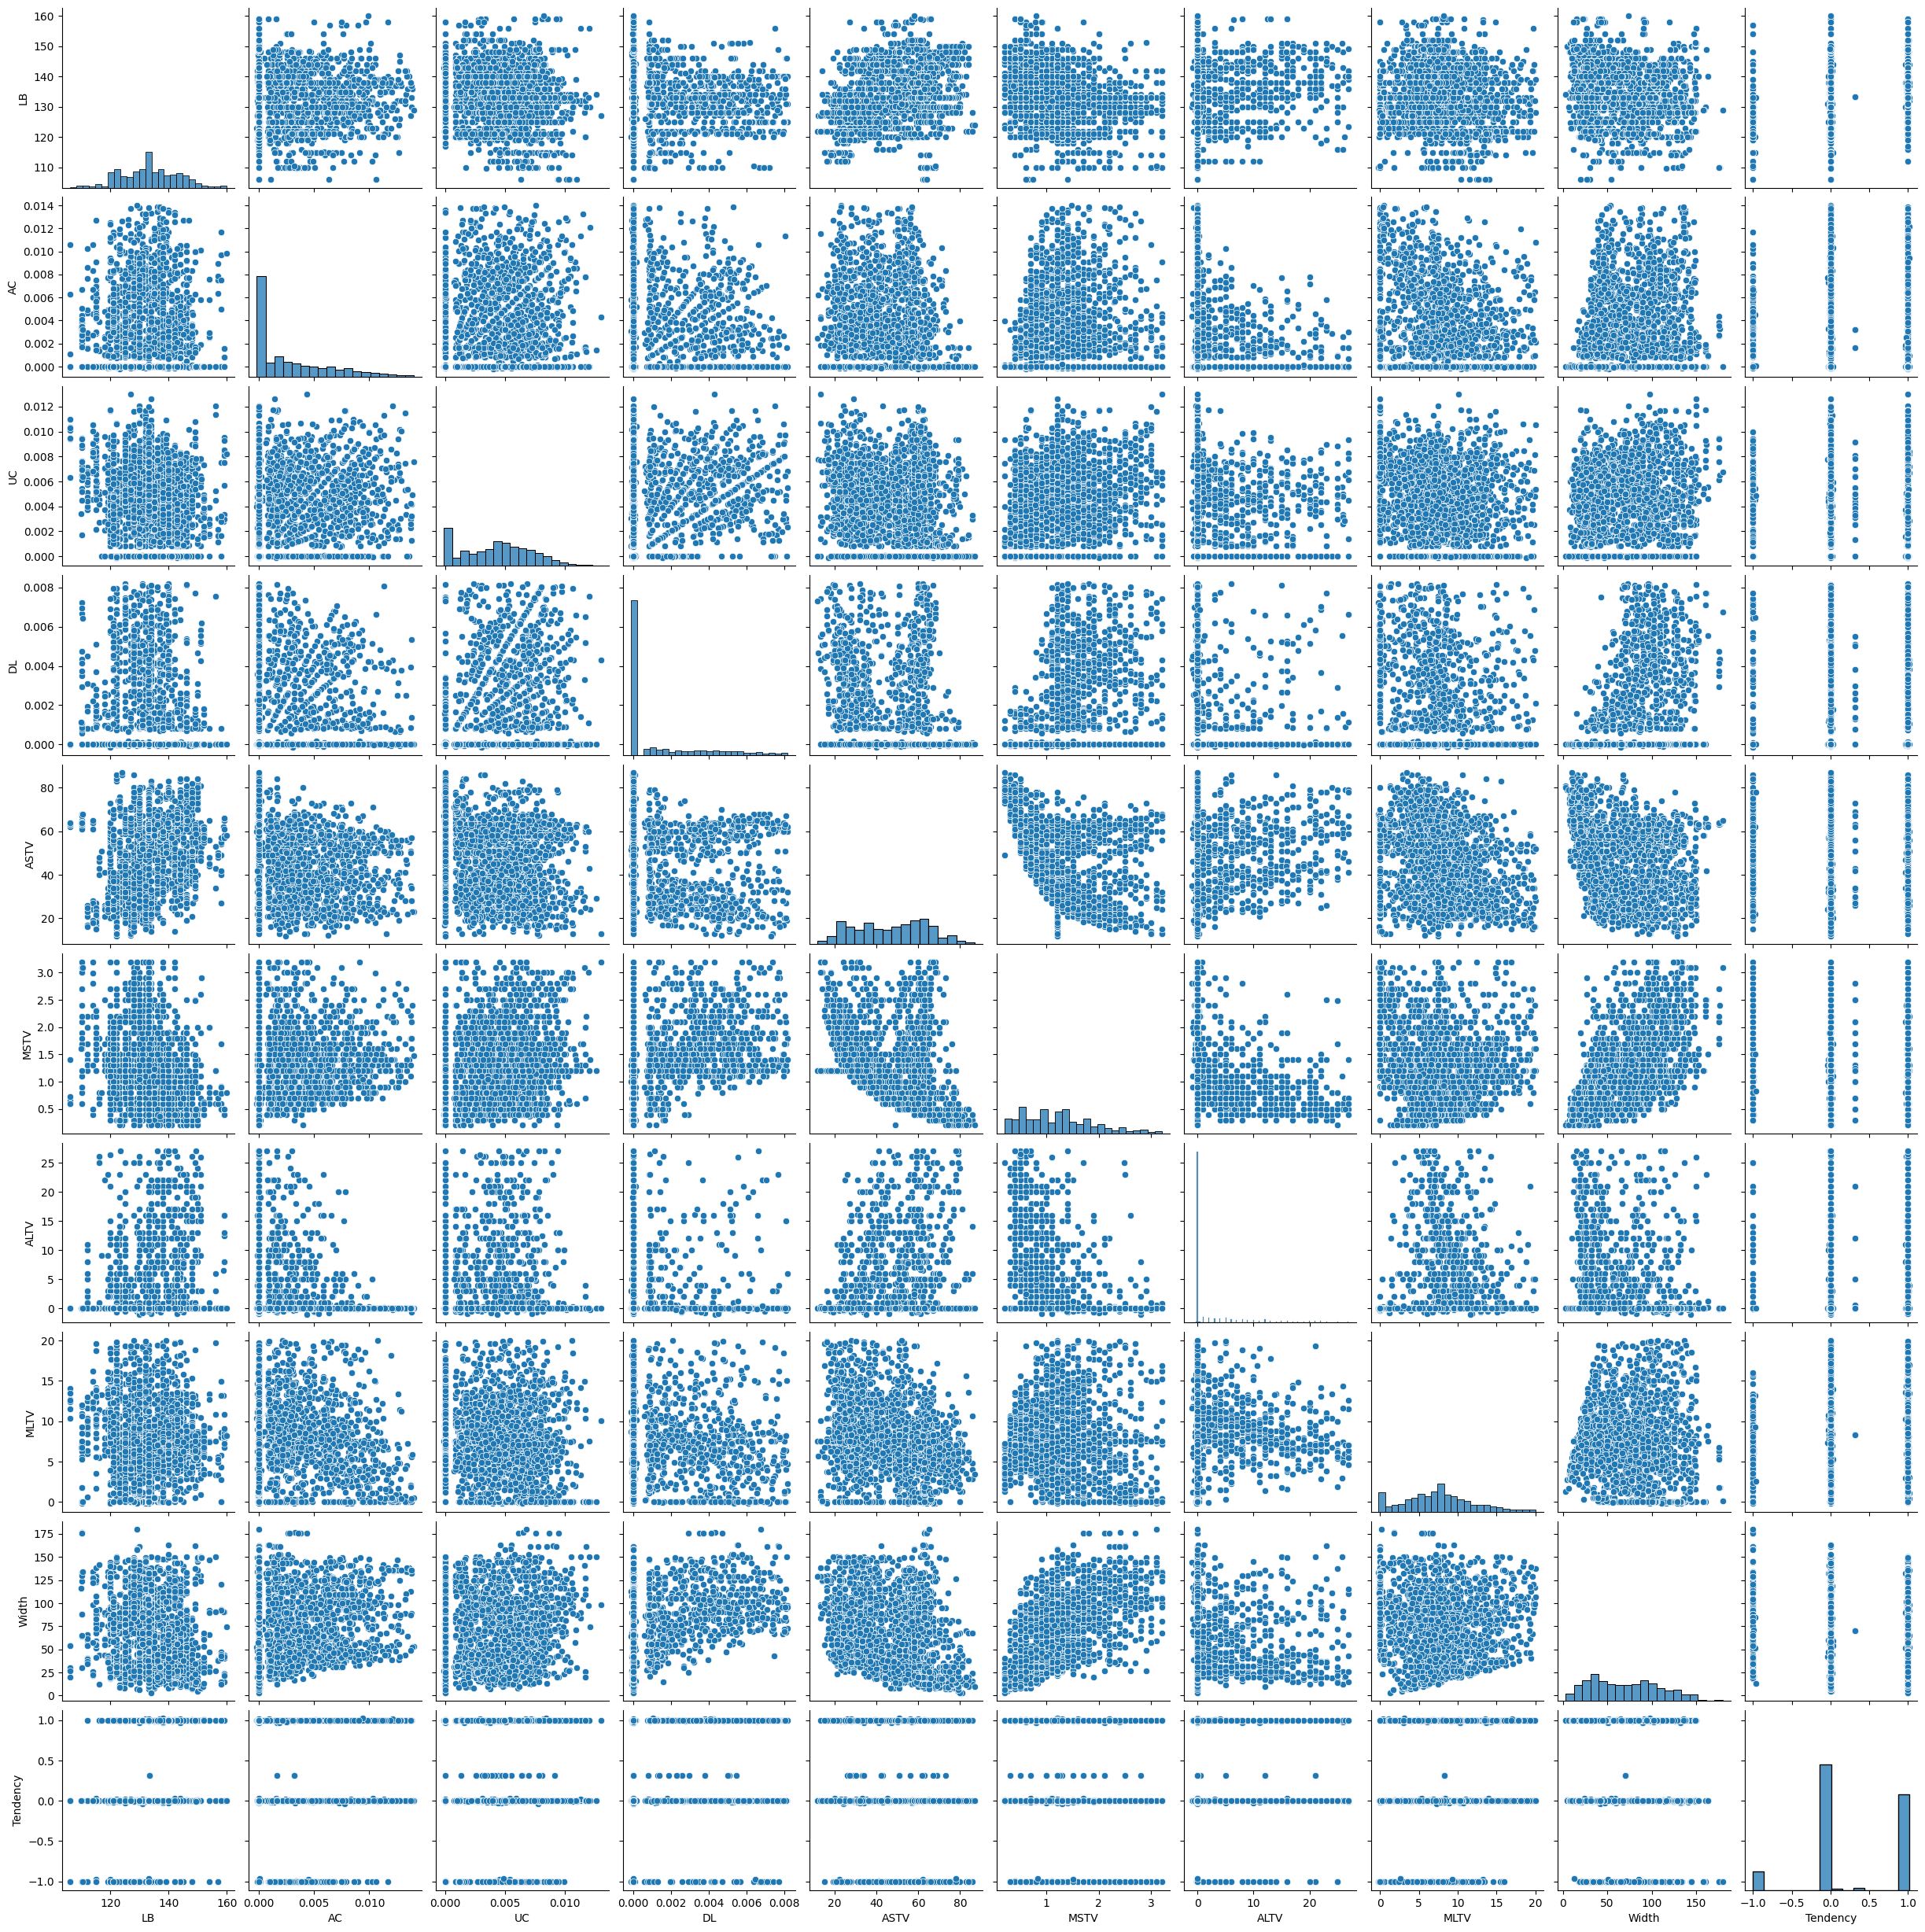

In [ ]:
# pairplot
sns.pairplot(df)
plt.show()

# Pattern recognition and Insights



*   MSTV & Width has strong positive correlation.
*   ASTV related to ALTV.
*   DL & MSTV are positively correlated.

*   MSTV - (ALTV & ASTV) are negatively correlated.

Most of them are weakly correlated, Further analysis could explore non linear relations between variables.